In [1]:
import tensorflow as tf

#### Tensorflow is a free and open-source library for machine learning and artificial intelligence

In [2]:
tf.__version__

'2.7.0'

#### Keras is a high level API for tensorflow

In [3]:
tf.keras.__version__

'2.7.0'

### List Hardware available for tenserflow : CPU and GPU

In [4]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
tf.config.list_physical_devices("GPU")

[]

In [6]:
tf.device('/device:GPU:0')

2022-05-02 15:16:40.024264: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Working on mnist dataset

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data() # mnist data has 10 classes (0-9)

In [10]:
X_train_full.shape # includes 6000 images of 28*28 size

(60000, 28, 28)

In [11]:
y_train_full.shape # y is the output, it a simple integer value so no size

(60000,)

##### Let's look more over the data points

In [12]:
X_train_full[0].shape # prints the size of the image

(28, 28)

In [14]:
y_train_full[0] # prints the value present in the first row

5

In [16]:
X_train_full[0] # This gives the image pixel value so we need to use imshow to visualize the image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Let's visualize the data present in more elegent way

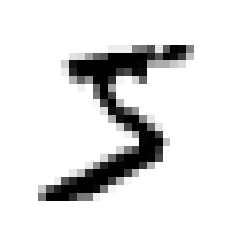

In [23]:
img = X_train_full[0]
plt.imshow(img, cmap="binary")
plt.axis("off") # just to get rid of the axis lines
plt.show()

<AxesSubplot:>

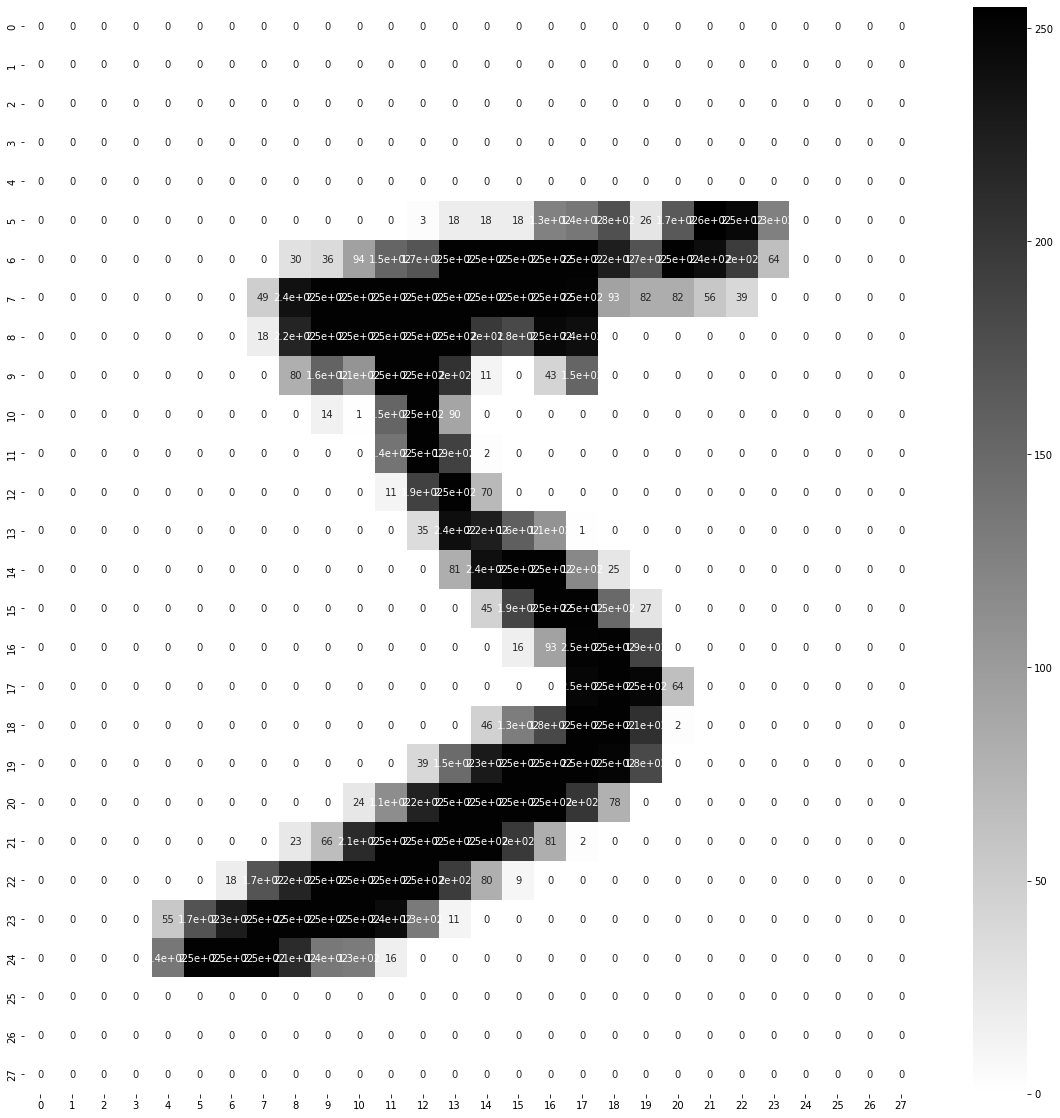

In [27]:
plt.figure(figsize = (20, 20))

# Plot rectangular data as a color-encoded matrix.
sns.heatmap(img, annot= True, cmap="binary") # annot true writes the value of each cell

#### If we look over the plot then we see that the data are so congusted so let's try to normalize the data between (0-1)

In [32]:
(img.min(), img.max()) # the value in the image renges from 0-255 so

(0, 255)

<AxesSubplot:>

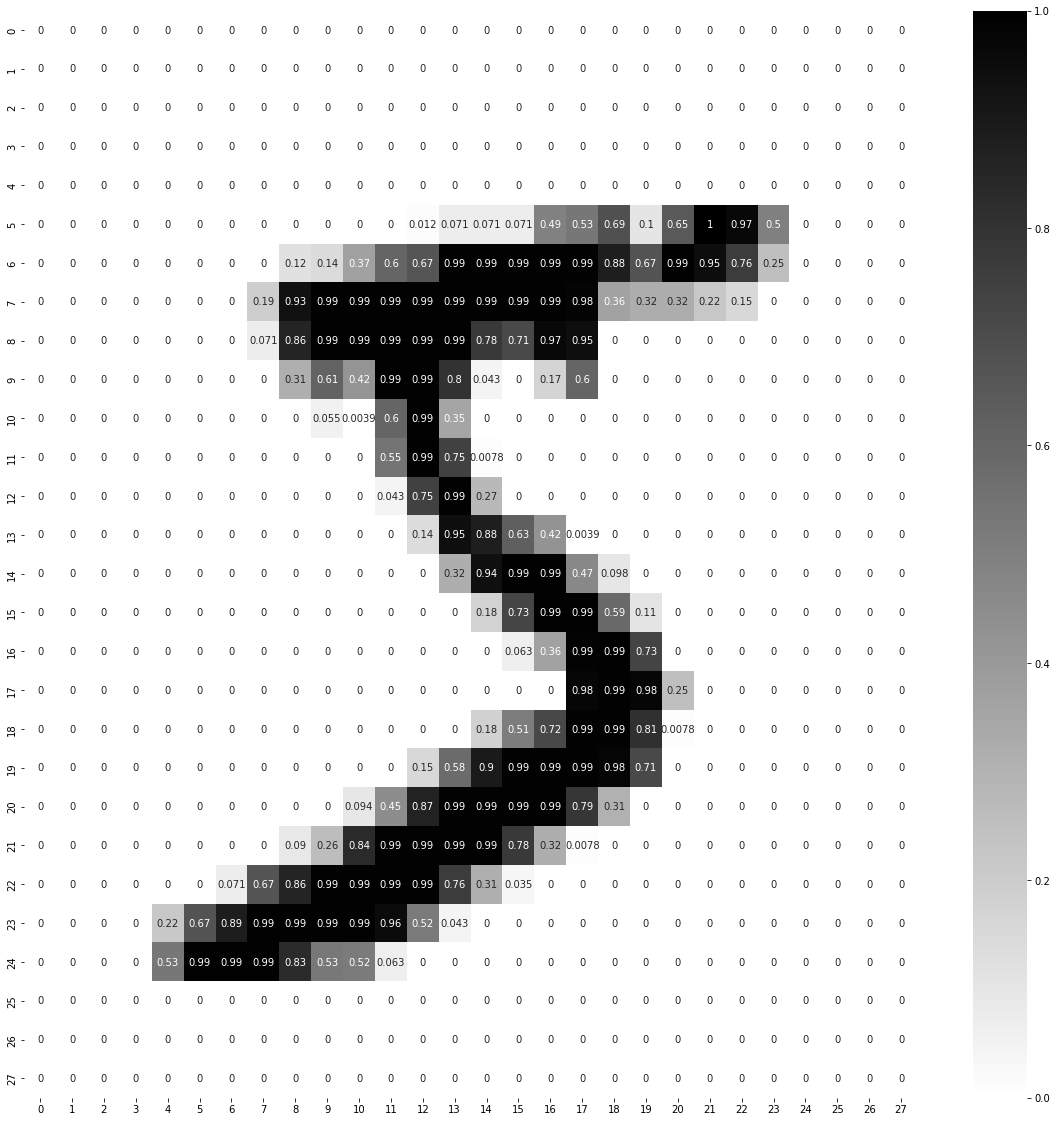

In [37]:
plt.figure(figsize = (20,20))
sns.heatmap(img/255, annot= True, cmap="binary")

#### Splitting the full training data into valid set and train set

In [41]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.  # normalizing the data as well
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [42]:
# normalizing the test set as well
X_test = X_test/255.

In [48]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape = [28, 28], name="inputLayer"),
    tf.keras.layers.Dense(300, activation= "relu", name="hiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [49]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [50]:
# Check the layers present
model_clf.layers

In [51]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


 ### Detail on model summary() function

In the first hidden layer there are 784 inputs from the output of inputLayer and there exists 300 hidden layer in firstLayer and each hidden layer consists of 1 bias unit so for 300 first hiddenLayer 300 bias units are present. Thus total number of trainable parameters in first hidden layer is 235500

In [56]:
# trainable parameters in first hidden layers
(784 * 300) + 300

# inputLayer * firstLayer + bias_on_first_layer 

235500

In [57]:
# similary on the second layer
(300*100 )+ 100

30100

In [58]:
(100 * 10)+10

1010

In [59]:
np.sum(235500 + 30100 + 1010)

266610

which is equal to the total params in the summary

Non-trainable params: 0, it is related to transferable learning

In [60]:
# Get the name of the layer
model_clf.layers[1].name

'hiddenLayer1'

In [62]:
# Get the weights on the layer
model_clf.layers[1].get_weights()

[array([[-0.05364365,  0.01846188, -0.05813631, ...,  0.05624901,
         -0.05422705, -0.06778324],
        [-0.04688134, -0.00997181,  0.04215924, ..., -0.05544278,
          0.0743794 , -0.0347967 ],
        [ 0.01905652,  0.06144479,  0.03858849, ..., -0.02896677,
         -0.0210352 ,  0.04081136],
        ...,
        [-0.00398396,  0.06621632, -0.0248491 , ...,  0.02203511,
          0.00453936, -0.07263738],
        [-0.02561467,  0.02534   ,  0.04095051, ...,  0.00094381,
         -0.03729843, -0.0069318 ],
        [ 0.07003085,  0.01434973,  0.05684529, ...,  0.02070653,
          0.04046685,  0.06093024]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [63]:
# the above code returned the weights and biases as a whole. Let's separate it
weights, biases = model_clf.layers[1].get_weights()

In [65]:
weights.shape

(784, 300)

In [66]:
biases.shape

(300,)

In [67]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"  # it is used for categorical set
OPTIMIZER = "SGD"   
METRICS = ["accuracy"]

# model compilation
model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [68]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

EPOCHS = 30
VALIDATION = (X_valid, y_valid) # validation data

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5904 - accuracy: 0.8458 - val_loss: 0.3021 - val_accuracy: 0.9148
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2878 - accuracy: 0.9183 - val_loss: 0.2403 - val_accuracy: 0.9290
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2361 - accuracy: 0.9327 - val_loss: 0.1997 - val_accuracy: 0.9422
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2015 - accuracy: 0.9432 - val_loss: 0.1746 - val_accuracy: 0.9510
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1759 - accuracy: 0.9500 - val_loss: 0.1570 - val_accuracy: 0.9560
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1561 - accuracy: 0.9556 - val_loss: 0.1455 - val_accuracy: 0.9596
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1402 - accuracy: 0.9597 - val_loss: 0.1313 - val_accuracy:

#### By default batch_size = 32
* here total number of data is 55000
- so when we 5000/32
- it is nearly 1719 so we can se 1719 data is trained at each batch

In [69]:
55000/32

1718.75

In [70]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [80]:
history.history # returns 30 loss values as well as accuracy val_loss and val_accuracy at each epoch

{'loss': [0.5903763771057129,
  0.2878490388393402,
  0.23605068027973175,
  0.2015010267496109,
  0.17591701447963715,
  0.15613070130348206,
  0.140211284160614,
  0.12672486901283264,
  0.11538515985012054,
  0.10523474961519241,
  0.09741679579019547,
  0.08979044109582901,
  0.08319227397441864,
  0.07737450301647186,
  0.07200231403112411,
  0.06733717024326324,
  0.06300272047519684,
  0.05858147144317627,
  0.05522427707910538,
  0.051809679716825485,
  0.04869812726974487,
  0.045585110783576965,
  0.04288322851061821,
  0.04014682024717331,
  0.037898242473602295,
  0.03555210307240486,
  0.03363450989127159,
  0.031602710485458374,
  0.029759248718619347,
  0.028127864003181458],
 'accuracy': [0.8457818031311035,
  0.9183090925216675,
  0.9326545596122742,
  0.9431818127632141,
  0.9499818086624146,
  0.9555636644363403,
  0.9596909284591675,
  0.9635454416275024,
  0.966981828212738,
  0.9703454375267029,
  0.9720727205276489,
  0.9752363562583923,
  0.9767272472381592,
  0

In [104]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [81]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.590376,0.845782,0.302067,0.9148
1,0.287849,0.918309,0.240304,0.9290
2,0.236051,0.932655,0.199677,0.9422
3,0.201501,0.943182,0.174644,0.9510
4,0.175917,0.949982,0.157014,0.9560
5,0.156131,0.955564,0.145481,0.9596
6,0.140211,0.959691,0.131308,0.9644
7,0.126725,0.963545,0.122904,0.9664
8,0.115385,0.966982,0.115723,0.9700
9,0.105235,0.970345,0.112419,0.9702


#### Ploting the data

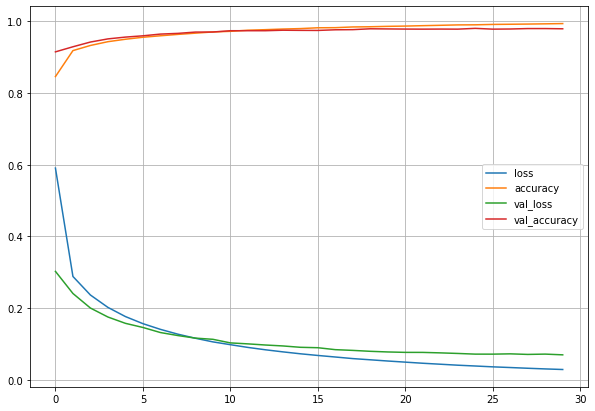

In [82]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

#### Evaluating the model using test data

In [84]:
model_clf.evaluate(X_test, y_test) # returns [loss, accuracy]

313/313 [==============================] - 0s 687us/step - loss: 0.0713 - accuracy: 0.9784


[0.07132002711296082, 0.9783999919891357]

In [97]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [98]:
y_prob.shape # (row, col)

(3, 10)

In [105]:
Y_pred = np.argmax(y_prob, axis= -1)  # Returns the indices of the maximum values along an axis.
# -1 is written to get the max value of each array

Y_pred

array([7, 2, 1])

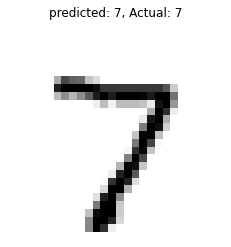

****************************************


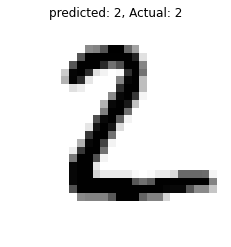

****************************************


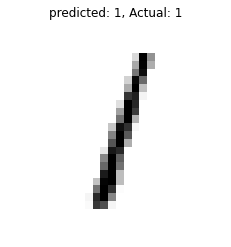

****************************************


In [103]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="binary")
    plt.title(f"predicted: {pred}, Actual: {actual}")
    plt.axis("off")
    plt.show()
    print("*"*40)